# Transformée de Fourier discrète d'un signal numérique

In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import signalfip as sig

Le signal temporel est une porte :

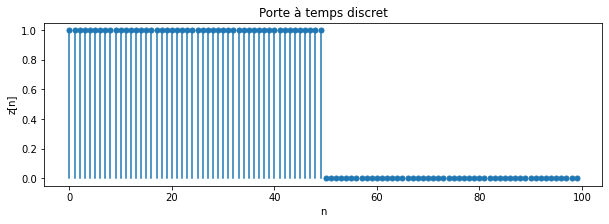

In [2]:
# Signal temporel (porte)

Te = 0.1

N = 100
n = np.arange(N)
z = np.where(n<50, 1, 0)

plt.figure(figsize=(10,3))
sig.stem(n,z)
plt.xlabel("n")
plt.ylabel("z[n]")
plt.title("Porte à temps discret")
plt.show()

Attention ! Le signal contient 100 échantillons (de 0 à 99) et l'échantillon en $n=50$ est nul !

In [3]:
# Affichage du spectre

def myplot(f, X, xlbl):
    fig, (axmod, axpha) = plt.subplots(1, 2, figsize=(15,4))
    axmod.plot(f,np.abs(X))
    axmod.set_xlabel(xlbl)
    axmod.set_ylabel("Module")
    #axmod.set_title(title)
    axpha.plot(f,np.angle(X))
    axpha.set_xlabel(xlbl)
    axpha.set_ylabel("Phase")
    plt.show()

## Spectre non centré, en fonction des échantillons

Par simplicité et lisibilité, les spectres sont tracés avec `plot` mais ils restent discrets !

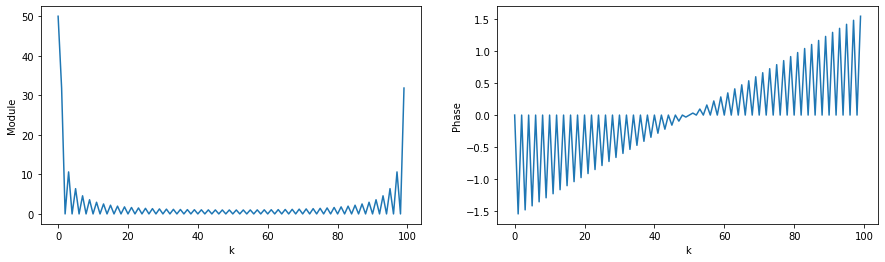

In [4]:
Z1 = fft.fft(z)
k1 = np.arange(N)
myplot(k1, Z1, "k")

## Spectre centré, en fonction des échantillons

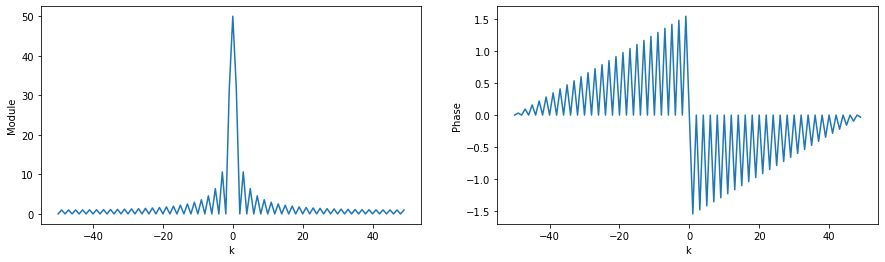

In [5]:
k2 = k1 - np.floor(N/2)
Z2 = fft.fftshift(Z1)
myplot(k2, Z2, "k")

## Spectre centré, en fonction de la fréquence

On vérifie que les abscisses représentent bien une période du spectre (entre $-f_e/2$ et $f_e/2$).

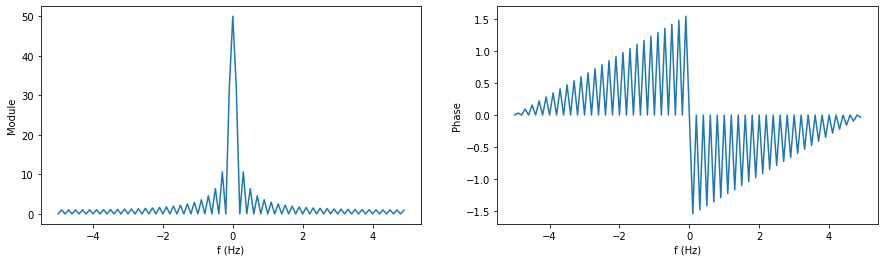

In [6]:
f = k2/(N*Te)
myplot(f, Z2, "f (Hz)")

## Application

Le signal temporel est :

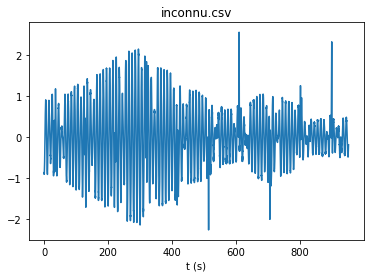

In [7]:
# Chargement du signal temporel
Te = 0.1
x = np.loadtxt("inconnu.csv", delimiter=',', skiprows=0)
N = len(x)
t = np.arange(N)*Te

# Affichage du signal temporel
plt.plot(t, x)
plt.xlabel('t (s)')
plt.title("inconnu.csv")
plt.show()

Son spectre est :

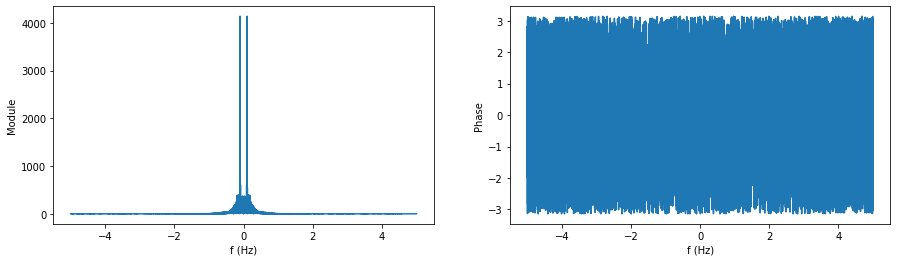

In [8]:
# Spectre
X = fft.fftshift(fft.fft(x))
k = np.arange(N) - np.floor(N/2)
f = k/(N*Te)
myplot(f, X, "f (Hz)")

La fonction `matplotlib.pyplot.xlim` permet de zoomer sur la partie intéressante :

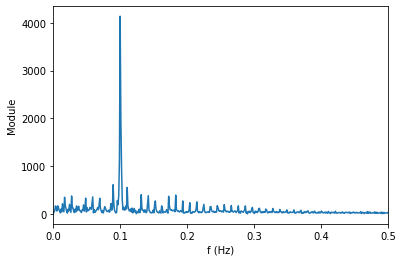

In [9]:
# Spectre (zoom)
plt.figure()
plt.plot(f,np.abs(X))
plt.xlabel("f (Hz)")
plt.ylabel("Module")
plt.xlim([0, .5])
plt.show()

La fréquence principale du signal est donc à 0,1 Hz.